**트리 알고리즘**

In [1]:
# 5-1) 결정 트리
#logistic 회귀로 와인 분류하기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe() 

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
# 특성을 표준화하기
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split( 
    data, target, test_size=0.2, random_state=42) 

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [10]:
print(lr.coef_, lr.intercept_) # logistic 회귀가 학습한 계수와 절편

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


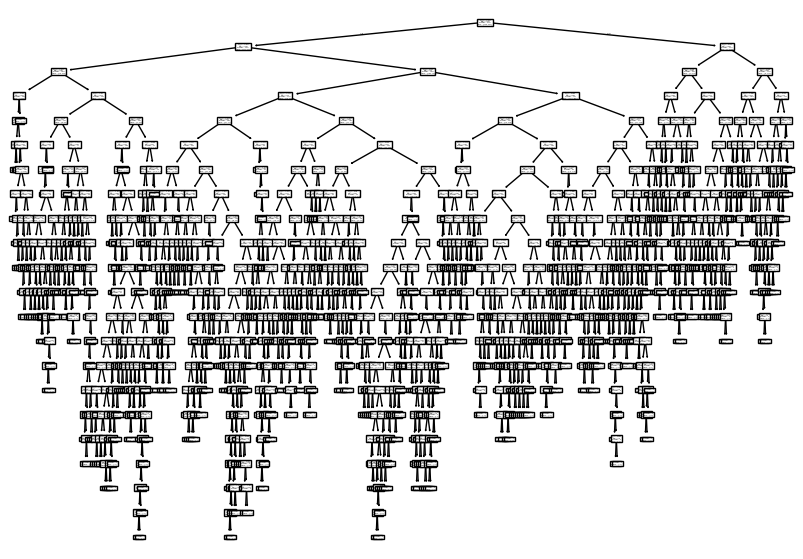

In [12]:
# dt 객체를 plot_tree() 함수로 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

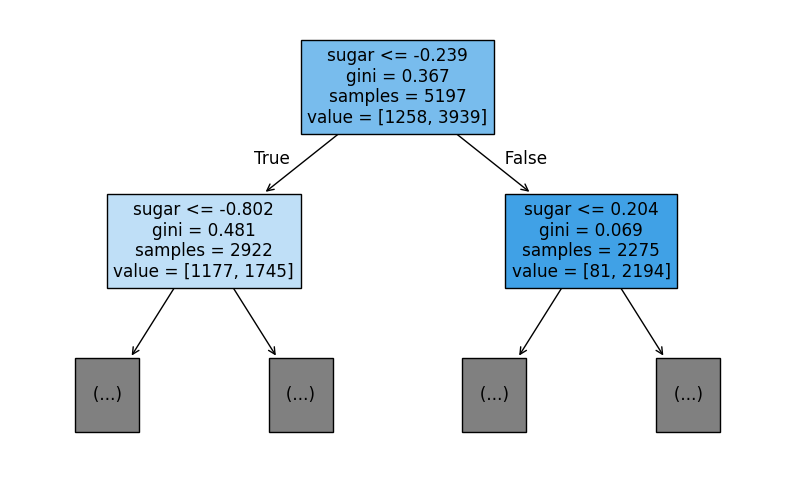

In [13]:
plt.figure(figsize=(10,6))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) 
plt.show()

테스트 조건 (sugar), 불순도 (gini), 총 샘플 수 (samples), 클래스 별 샘플 수 (value)

왼) 조건 만족, 오) 조건 불만족

해석) -0.239와 작거나 같으면 왼쪽이므로 음성(red)는 1258개, 양성(white)는 3939개이다.

결과) leaf-node에서 가장 많은 클래스가 예측 클래스가 된다. 

**불순도 (gini)**

당도를 -0.239와 같이 나누는 기준이 된다. 공식: 1- (음성 클래스 비율^2 + 양성 클래스 비율^2), ex) 1-((2158 / 5197)^2 + (3939/5197)^2) = 0.367

decision tree model은 부모 노드와 자식 노드의 gini 차이가 가능한 크도록 트리를 만든다. 

-> 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더한다. 그 다음 부모 노드의 불순도에서 뺀다. 

ex) root에서 보면 왼) 2922개, 오) 2275개 샘플이 이동했다. 

불순도 차이(정보 이득): 부모의 불순도 - (왼쪽 node 샘플 수 / 부모의 샘플 수)x왼쪽 node 불순도 - (오른쪽 node 샘플 수 / 부모의 샘플 수)x오른쪽 node 불순도 

= 0.367 - (2922/5197)x0.481 - (2275/5197)x0.069 = 0.066

**criterion='entropy'** : 불순도를 구하는 다른 방법

-음성 클래스 비율 x log2(음성 클래스 비율) - 양성 클래스 비율 x log2(양성 클래스 비율)

= -(2158 / 5197) x log2(1258/5197) - (3939/5197) x log2(3939/5197) = 0.798

In [14]:
# 가지치기: max_depth 지정
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


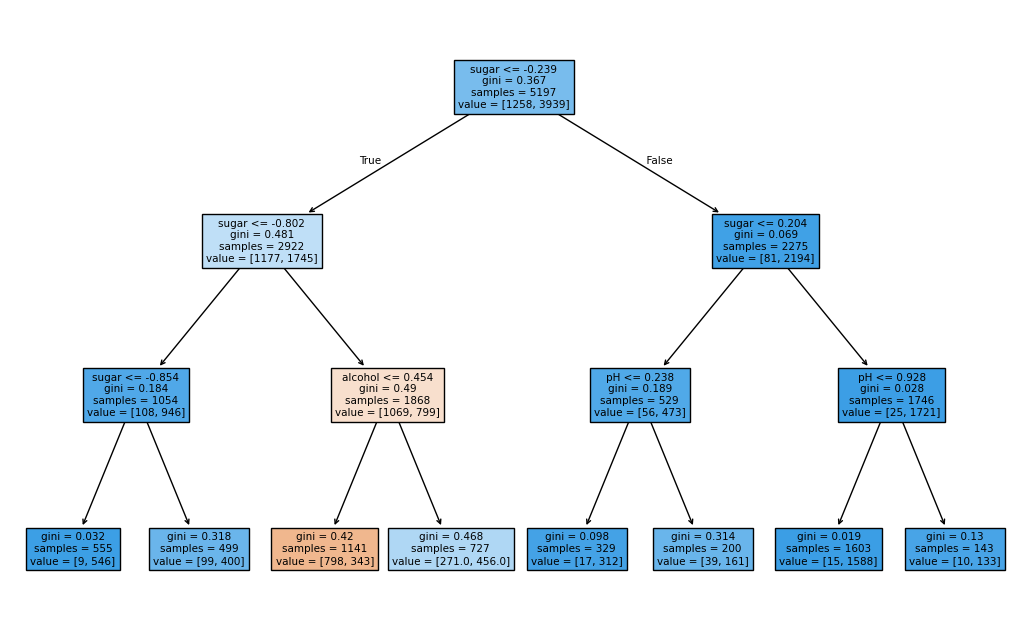

In [15]:
plt.figure(figsize=(13,8))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

해석) leaf-node에서 왼쪽에서 3번째 node만 음성 클래스가 많다. 즉, 이 노드에 도착해야 음성(red)으로 예측한다. 

불순도를 기준으로 샘플을 나눈다. 불순도는 class 별 비율로 계산한다. 특성 값의 scale이 어떤 class 비율로 나누는지 계산할 때 영향을 미치지 않는다. 

-> 전처리 할 필요가 없다. (deicision-tree의 장점)

In [16]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


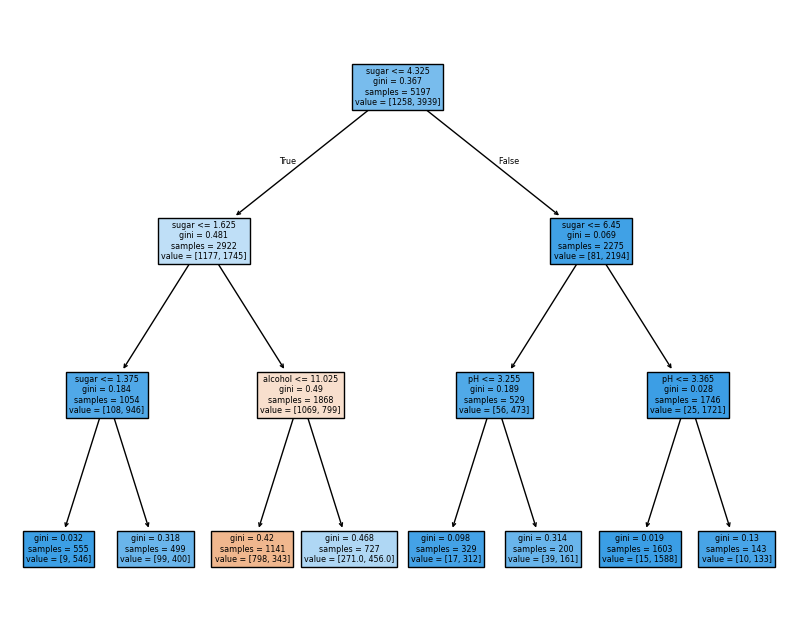

In [17]:
plt.figure(figsize=(10,8))
plot_tree(dt, filled=True, feature_names = ['alcohol','sugar', 'pH'])
plt.show()

In [18]:
# 특성 중요도: 어떤 특성이 가장 유용한지 나타냄 (다 더하면 1)
print(dt.feature_importances_) #2번째 특성인 당도가 가장 높음

[0.12345626 0.86862934 0.0079144 ]


**5-2) 교차 검증과 greed 서치**

테스트 세트로 성능을 확인하다보면 점점 테스트 세트에 맞추게 된다.

따라서 훈련 세트를 또 나누어 validation set으로 측정한다.

전체 100%를 60%의 train-set, 20%의 test-set, validation-set을 만든다.

In [19]:
# train-set을 다시 val-set으로 나눈다.
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [20]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target)) 
# 과대적합

0.9971133028626413
0.864423076923077


**교차 검증**

<img src="cross_val.jpg" alt="description" width="500"/>

검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복한다.

위의 그림에서 train-set을 3부분으로 나눠서 교차 검증을 수행한다.

In [22]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.0130794 , 0.00996637, 0.009866  , 0.00629139, 0.00683403]), 'score_time': array([0.00099707, 0.00099683, 0.0009973 , 0.00113106, 0.        ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [23]:
import numpy as np
print(np.mean(scores['test_score'])) # test_score에 담긴 5개의 점수 평균 (검증 fold의 점수)

0.855300214703487


cross_validate()는 train-set을 섞지 않고 fold를 나눔

회귀모델 - KFold 분할기, 분류모델 - StratifiedKFold 분할기

In [24]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [25]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


**hyperparameter 튜닝**

GridSearchCV: hyperparameter 탐색과 교차 검증을 한번에 수행한다. 별도로 cross_validate()함수를 호출할 필요가 없다.

교차 검증에서 최적의 hyperparameter를 찾으며 전체 train-set로 모델을 다시 만들어야 했다. 하지만 gridsearch는 훈련한 모델 중에서 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 train-set에서 자동으로 모델을 훈련한다.

In [83]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': np.arange(0, 1.1, 0.01).tolist()}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=1) #n_jobs - 병렬 실행에 사용할 cpu 코어 수

gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'min_impurity_decrease': [0.0, 0.01, 0.02, 0.03, 0.04,
                                                   0.05, 0.06, 0.07, 0.08, 0.09,
                                                   0.1, 0.11, 0.12, 0.13, 0.14,
                                                   0.15, 0.16, 0.17, 0.18, 0.19,
                                                   0.2, 0.21, 0.22, 0.23, 0.24,
                                                   0.25, 0.26, 0.27, 0.28, 0.29, ...]})

In [84]:
print(gs.best_estimator_)

DecisionTreeClassifier(random_state=42)


In [85]:
dt= gs.best_estimator_ #최적의 매개변수
print(dt.score(train_input, train_target))
print(gs.best_params_)

0.996921300750433
{'min_impurity_decrease': 0.0}


In [28]:
# 각 매개변수에서 수행한 cross-val의 평균 점수
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [29]:
best_index = np.argmax(gs.cv_results_['mean_test_score']) # 가장 큰 값의 idx 추출
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


<과정>

1. 탐색할 매개변수 지정

2. train-set에서 grid-search를 수행하여 최상의 avg val-score가 나오는 매개변수 조합을 찾아 grid-search 객체에 저장

3. grid-search는 최상의 매개변수에서 cross-val에서 사용한 train-set이 아닌 전체 train-set을 사용하여 훈련한다.

In [30]:
#min_impurity_decrease: node 분할하기 위한 불순도 감소 최소량
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 0.0001에서 0.0001씩 증가하여 0.001까지 (9번)
          'max_depth': range(5,20,1), # 15개
          'min_samples_split': range(2,100,10)} # 10개 
# 9x15x10에서 5-fold를 수행하므로 총 6750번!

In [31]:
gs=GridSearchCV(DecisionTreeClassifier(random_state=42), params)
gs.fit(train_input, train_target)

c:\anaconda\envs\weit_python\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [32]:
#최상의 매개변수 조합
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [33]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


**랜덤 서치**
매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 때 쓴다.

매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 sampling할 수 있는 확률 분포 객체를 전달한다. 

In [34]:
from scipy.stats import uniform, randint # 주어진 범위에서 고르게 값을 뽑는 class / randint: 정숫값, uniform: 실숫값

In [35]:
# 1. randint
# 0~10 사이의 randint 객체를 만들고 숫자 10개 sampling
rgen = randint(0,10)
rgen.rvs(10)

array([8, 3, 4, 5, 6, 2, 5, 6, 9, 1])

In [36]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([105,  85, 103,  99,  84, 106, 120,  99, 106,  93]))

In [37]:
# 2. uniform
ugen = uniform(0,1)
ugen.rvs(10)

array([0.52056574, 0.25070566, 0.99202282, 0.83674491, 0.06037125,
       0.10623558, 0.69776231, 0.54232342, 0.8302231 , 0.23677361])

In [38]:
params = {'min_impurity_decrease': uniform(0.001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split': randint(2,25), # leaf node가 되기 위한 최소 샘플의 개수(이보다 작으면 split 안 함)
          'min_samples_leaf': randint(1,25),
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter = 100, random_state=42) #100번을 샘플링하여 교차검증하고 최적의 매개변수 조합 찾기
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025422A78DD0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025422A781A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025422A7B440>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025422A79F10>},
                   random_state=42)

In [40]:
# 최적의 매개변수 조합
print(gs.best_params_)

{'max_depth': 45, 'min_impurity_decrease': np.float64(0.001025419126744095), 'min_samples_leaf': 13, 'min_samples_split': 20}


In [41]:
#최적의 교차 검증 점수
print(np.max(gs.cv_results_['mean_test_score']))

0.8647301399274451


In [42]:
#best_estimator_: 최적의 모델이 train_input,target에 훈련되어 best_estimator_에 저장되어 있음
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.8561538461538462


**트리의 앙상블**

정형 데이터: csv 파일과 같이 어떤 구조로 되어 있는 것, 비정형 데이터: 책의 글, 사진, 음악 등등

앙상블 학습: 정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘 / 비정형 데이터에는 신경망 알고리즘을 사용한다.

**랜덤 포레스트**: 결정 트리를 랜덤하게 만들어 숲을 만든다. 각 결정 트리의 예측을 사용해 최종 예측을 만든다. 

트리를 훈련하기 위해 훈련 데이터에서 랜덤하게 샘플을 추출하는데 한 샘플이 중복되어 추출될 수 있다. 이를 **bootstrap sample**이라고 부른다.

각 노드를 분할할 때 전체 특성 중 일부를 랜덤하게 고르고 최선의 분할을 찾는다. randomforestclassifier는 전체 특성 개수의 제곱근 만큼 특성을 고른다. randomforestregressor는 전체 특성을 사용한다.

randomforest는 100개의 decisiontree를 이런 식으로 훈련한다. 그리고 분류일 때는 각 트리의 **class별 확률**을 평균하여 가장 높은 확률을 가진 class를 예측으로 삼는다. 회귀일 때는 각 트리의 **예측**을 평균한다.

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
# 5-3)
rf = RandomForestClassifier(random_state=42)

In [44]:
scores = cross_validate(rf, train_input, train_target,
                        return_train_score=True) #model의 train-set에 대한 성능 점수를 함께 반환(False면 test_score만 반환함)
print(np.mean(scores['train_score']), np.mean(scores['test_score'])) # 과대적합

0.9973541965122431 0.8905151032797809


feature_importances_

: decision-tree가 제공하는 매개변수로 randomforest도 제공한다. 이는 각 dt의 결정 중요도를 취합한 것

In [45]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)
# 이전 결과와 비교했을 때 당도의 중요도 감소; rf는 feature의 일부를 랜덤하게 선택하여 tree를 train하기 때문

[0.23167441 0.50039841 0.26792718]


**OOB 샘플**

randomforestclassifer는 자체적으로 모델을 평가하는 점수를 얻을 수 있다. 

train-set에서 중복을 허용하여 boot-strap sample을 만들어 decision tree를 훈련하는데 이 샘플에 포함되지 않고 남는 샘플을 말한다.

oob_score = True로 지정한다. randomforest는 각 dt의 oob score를 평균하여 출력한다.

In [46]:
rf=RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


**엑스트라 tree**

:random forest와 비슷하다. 100개의 random tree를 학습한다.

특징) bootstrap sample을 제공하지 않는다. 각 decision tree를 만들 때 전체 train-set을 이용한다. 노드를 분할할 때 가장 좋은 분할이 아닌 무작위로 분할한다. 이를 통해 랜덤성을 극대화하여 더욱 다양한 트리를 생성한다. 

모델에서 사용하는 decision tree는 splitter='random'이라는 설정을 가지며, 이는 노드 분할 방식을 무작위로 선택한다는 뜻이다.


In [47]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(random_state=42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# random-forest와 비슷한 결과 (특성이 많지 않기 때문임)

0.9974503966084433 0.8887848893166506


In [48]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


**gradient boosting**

깊이가 얕은 decision tree를 사용하여 이전 트리의 오차를 보완하며 앙상블한다. 

sklearn에서 GradientBoostingClassifier는 깊이가 3인 decision-tree 100개를 사용함

분류) logistic loss fuction, 회귀) 평균제곱오차 함수 사용함

경사하강법: loss function이 가장 낮은 곳을 찾아 내려오는 과정임 (모델의 가중치와 절편을 바꾸기)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True) 
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 점수가 비슷, 과대 적합이 되지 않는다.

0.8881086892152563 0.8720430147331015


In [50]:
# 성능 향상
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True) 
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


gradient boosting도 특성 중요도를 제공한다.

In [51]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15882696 0.6799705  0.16120254]


subsample: tree 훈련에 사용할 train-set의 비율을 결정하는 매개변수

일반적으로 gradient boosting이 random forest보다 성능이 높다. 하지만 train 속도가 느리다. 

**히스토그램 기반 gradient boosting**

:일반적인 gradient boosting 모델보다 학습 속도를 높이고 성능을 향상시키기 위해 히스토그램을 사용하여 데이터를 그룹화하는 방법이다.

**개념**

일반적인 그레이디언트 부스팅 알고리즘은 **여러 결정 트리를 순차적으로 학습**시켜 오류를 점진적으로 줄여간다. 하지만 많은 양의 데이터를 사용하는 경우, 모든 데이터 포인트에 대해 노드 분할 기준을 계산하는 것은 매우 느릴 수 있다. 따라서 히스토그램 기반 gradient boosting은 연속형 특성 값을 구간으로 나누어, 각 구간의 값 빈도(히스토그램)를 사용해 데이터를 빠르게 처리한다.

**동작 원리**

특성 구간화: 각 연속형 특성을 일정한 구간으로 나누고, 각 구간에 속하는 데이터 포인트의 개수를 계산하여 히스토그램을 생성한다.

효율적인 분할: 이 히스토그램을 사용하여 노드를 분할할 때, 모든 데이터 포인트를 개별적으로 평가하지 않고 히스토그램 구간별로 계산하여 분할 기준을 찾는다.

트리 학습: 트리를 여러 개 쌓으면서 잔여 오차를 줄여나가는 방식이지만 히스토그램을 사용해 효율적으로 최적의 분할을 찾기 때문에 학습 속도가 빨라진다.

In [52]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

c:\anaconda\envs\weit_python\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9321723946453317 0.8801241948619236


**permutaion_importance**

: 히스토그램 기반 gradient-boosting의 특성 중요도를 계산함

특성을 랜덤하게 섞어서 모델의 성능이 변화하는지를 관찰하여 어떤 특성이 중요한지를 계산함

매개변수) n_repeats: 랜덤하게 섞을 횟수

In [53]:
from sklearn.inspection import permutation_importance
# 1. test-set
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target,
                                n_repeats=10, random_state=42)
print(result.importances_mean)
# 반환 값: importances, importances_mean, importances_std

[0.08876275 0.23438522 0.08027708]


In [54]:
# 2. train_set
result = permutation_importance(hgb, test_input, test_target,
                                n_repeats=10, random_state=42)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [55]:
hgb.score(test_input, test_target)

0.8723076923076923

**XGBoost**

: gradient-boosting을 구현하는 다른 라이브러리

sklearn의 cross_validate() 함수와 함께 사용할 수도 있다. 

다양한 boosting 알고리즘을 지원한다.

tree_method = 'hist'로 지정하면 히스토그램 기반 gradient boosting이다.

In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


**LightGBM**

: 히스토그램 기반 gradient-boosting을 구현하는 라이브러리

In [57]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores  =cross_validate(lgb, train_input, train_target,
                        return_train_score=True)

[LightGBM] [Info] Number of positive: 3151, number of negative: 1006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757999 -> initscore=1.141738
[LightGBM] [Info] Start training from score 1.141738
[LightGBM] [Info] Number of positive: 3151, number of negative: 1006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757999 -> initscore=1.141738
[LightGBM] [Info] Start training from score 1.141738
[LightGBM] [Info] Number o

In [58]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
